# Calculating quantum information from copper nitrate

Allen Scheie

May, 2024

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## Calculate two-tangle $\tau_2$

Using data from Xu, PRL (2000) https://doi.org/10.1103/PhysRevLett.84.4465

$$
\tau_2 = 2 \sum_{r \neq 0} C_r^2
$$
For isotropic systems where $g_r^{xx} = g_r^{yy} = g_r^{zz} < 0$, 
$$
C_r = 2 \max \left\{ 0, 2|g_r^{zz}| - \left| \frac{1}{4} + g_r^{zz} \right| \right\}
$$
and because the system is isotropic, we assume 
$$
g_r^{zz} = \frac{1}{3} \langle S_0 \cdot S_r \rangle
$$

Text(0.5, 0, '$T$ (K)')

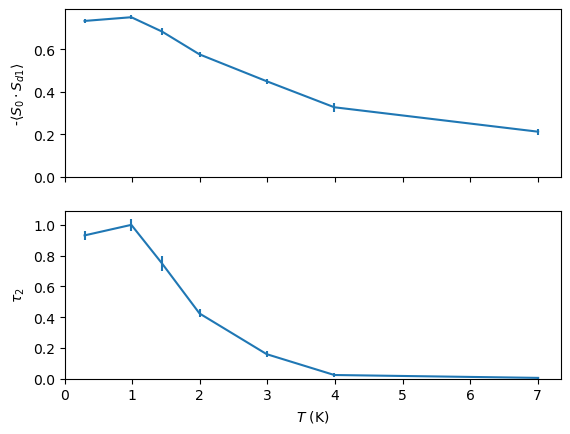

In [5]:
SdotS = np.genfromtxt('CopperNitrate_SdotS.dat')

## Note the The largest value exceeds the physical bound of 3/4, 
## so we normalized the largest value to this. In general, this
## should not be necessary if absolute unit conversion is done correctly. 


## Calculate concurrence 
Gzz = -SdotS[1]/3
Cr = 2*(2*np.abs(Gzz) - np.abs(1/4 + Gzz))

## Calculate two-tangle (simple relation as only one neighbor is considered)
tau2 = Cr**2
## Uncertainty (derived from derivative of tau_2)
dtau2 = 2*np.abs(Cr)*6 * (SdotS[2]/3)


############# Plot results

f, ax = plt.subplots(2,1, sharex=True)
ax[0].errorbar(SdotS[0], SdotS[1], SdotS[2])
ax[1].errorbar(SdotS[0], tau2, dtau2)

for i in range(2):
    ax[i].set_ylim(0,)
    ax[i].set_xlim(0,)
ax[0].set_ylabel('-$\\langle S_0 \\cdot S_{d1} \\rangle$')
ax[1].set_ylabel('$\\tau_2$')
ax[-1].set_xlabel('$T$ (K)')

## Calculate nQFI

These data come from Tennant, PRB (2003), https://doi.org/10.1103/PhysRevB.67.054414 
using the normalization from Xu, PRL (2000) https://doi.org/10.1103/PhysRevLett.84.4465

#### Equations

$$
\mathrm{nQFI}\left[ {\bf Q} \right]= \frac{f_\mathcal{Q}\left[ {\bf Q} \right]}{12 S^2}
$$

$$
	f_\mathcal{Q} \left[ {\bf Q} \right]  = \frac{4}{\pi}	\int_{0}^\infty \mathrm{d}(\hbar \omega) \tanh \left( \frac{\hbar \omega}{2 k_BT }\right) \chi^{\prime\prime}_{\alpha \alpha} \left( {\bf Q}, \hbar \omega\right)
$$

$$
 \chi_{\alpha \beta}''\left( {\bf Q}, \omega \right)	=
 \pi \left( 1-e^{-\hbar\omega/k_B T} \right) S_{\alpha \beta}({\bf Q},\omega)	
$$

We combine the equations to get 

$$
        {\rm nQFI}\left[{\bf Q}\right] = \frac{1}{3 S^2}
    \int_{0}^\infty   \mathrm{d}(\hbar \omega) \bigg[ \tanh \left( \frac{\hbar \omega}{2 k_BT }\right) 
    \left( 1-e^{-\hbar\omega/k_B T} \right) S_{\alpha \alpha} ( {\bf Q}, \hbar \omega ) 
    \bigg] 
$$

**************************************************
nQFI = 0.7815015513351338 +/- 0.15642868090664905
**************************************************


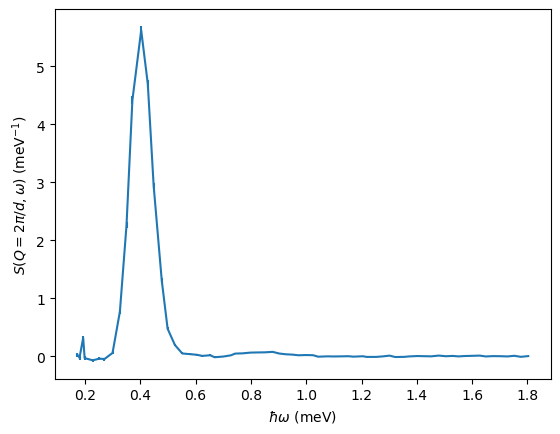

In [8]:
## Import data
Sqw = np.genfromtxt('CopperNitrate_Swq_2pid.dat', unpack=True)

## plot data
plt.figure()
plt.errorbar(Sqw[0], Sqw[1], Sqw[2])
plt.xlabel('$\\hbar \\omega$ (meV)')
plt.ylabel("$S(Q=2\\pi/d,\\omega)$ (meV$^{-1}$)")

###################### Calculate QFI
Temperature = 0.3 # K
kB = 8.617333262e-2 # meV/K
kT = kB*Temperature

## Calculate prefactor
S = 0.5
energyscale = 1/(3 * S**2) * (1 - np.exp(-Sqw[0]/kT)) * np.tanh(Sqw[0]/(2*kT))

## Calculate QFI
dhw = np.hstack((Sqw[0][1:] - Sqw[0][:-1], Sqw[0][-1] - Sqw[0][-2]))  # for integration
QFI = np.sum(Sqw[1]*energyscale*dhw)
dQFI = np.sqrt(np.sum((Sqw[2]*energyscale*dhw)**2)) # Statistical uncertainty

## Now we add in 20% uncertainty from the absolute unit conversion:
RelativeNormUncertainty = 0.20
dQFI = np.sqrt(dQFI**2 + (RelativeNormUncertainty*QFI)**2)


## Print output:
print("*"*50)
print('nQFI =',QFI, '+/-', dQFI)
print("*"*50)

## Comments on output:

The two-tangle is nearly 1, which indicates strong pairwise entanglement. The nQFI is less than 1, which means no entanglement is witnessed along the dimer wavevector. 
This is consistent with a dimerized ground state, where all entanglement is found in pairs rather than an extended fashion through the lattice. 

Note that the nQFI equation would be divided by 2 if we had normalized the data to  be $\tilde{S}(Q,\omega)$ instead of $S_{\alpha \alpha}(Q,\omega)$ (using the isotropic approximation). One must be careful and consistent with unit conversions.